# DSCI 521: Methods for analysis and interpretation <br> Chapter 4: Networks, metrics, and applications

## 4.1 Networks

We've already discussed how linear algebra lets us do arithmetic with lots of data and manage data with many variables. It will also allow us to measure comparisons of variables in a holistic context, and even provide insight into when we can get rid of some data for not contributing much information. In other words, it can tell us which variables in our data are the most important. But the key perspective&mdash;that linear algebra provides&mdash;of focus here is the networks framework for analysis. Networks are also called graphs, and we'll use vernaculars from time to time. Intuitively, networks model relationships between entities, such as: who's friends with whom? You've probably seen them before depicted as ball-and-stick diagrams and referred to as social networks:

![social_network](images/Social-network.png)

### 4.1.1 Defining networks: Links (Edges) and Nodes (Vertices)

To define a network you have to keep track of two different collections: nodes and links (which are also referred to as $\mathcal{V}$ertices and $\mathcal{E}$dges, respectively, in the graph vernacular). We'll refer to these by the former names for their intuitiveness. The nodes (i.e., balls) are the entities, e.g., people in a social network, and are represented by a set of unique identifiers:
$$\mathcal{V} = \{A, B, C, D, E, F, G\}.$$

With a set of nodes, a network's links are then described by a set of pairs of nodes. The order in which the nodes are listed in each pair can indicate the link's direction:
$$\mathcal{E} = \{AF, BE, CB, CD, DE, EB, EG, FE, GA\}.$$

### 4.1.2 Representing networks

#### 4.1.2.1 Adjacency matrices
To represent a network in a computer, we can use a square matrix called an _adjacency matrix_. Think of it as having the names of the nodes along the rows and the columns to store the existence of a link pointing from node $X$ to $Y$ by a non-zero entry in row $X$, column $Y$. So, continuing with our example above we would have the adjacency matrix:

$$ \begin{matrix} & A & B & C & D & E & F & G \\ A & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\ B & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ C & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\ D & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ E & 0 & 1 & 0 & 0 & 0 & 0 & 1 \\ F & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ G & 1 & 0 & 0 & 0 & 0 & 0 & 0 \end{matrix} $$

We can store this easily in Python by using a numpy array and take row and column sums to see which nodes have the most incoming and outgoing links:

In [4]:
import numpy as np

## Store our network in an adjacency matrix
adj = np.array([
    [ 0, 0, 0, 0, 0, 1, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 0, 0, 0, 1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 1, 0, 0, 0, 0, 0, 0]
])

## find the outgoing numbers of links (axis = 1)
## a.k.a., the row sums
print(np.sum(adj, axis = 1), '\n')

## find the incoming numbers of links (axis = 0)
## a.k.a., the column sums
print(np.sum(adj, axis = 0), '\n')

[1 1 2 1 2 1 1] 

[1 2 0 1 3 1 1] 



#### 4.1.2.2 Adjacency lists
Actually, there's a lot of unnecessary data here in the adjacency matrix picture. While the adjacency matrix is the mathematical way in which a network is represented and operated on, it wastes a lot of storage space (on the computer). Since many networks are _sparse_, or only have a few links relative to the total number that are possible, it is often much more efficent to create adjacency lists, which represent links as either incoming or outgoing only. For simplicity, let's create one for the outgoing links. This technically is all that is needed to represent the entire network. Here's a good question and exercise:

+ What does it take to create an incoming adjacency list?

In [5]:
## Store our network in an outgoing adjacency list
adj_list = {
    "A": ["G"],
    "B": ["E"],
    "C": ["B", "D"],
    "D": ["E"],
    "E": ["B", "G"],
    "F": ["E"],
    "G": ["A"]
}

## check out Cs outgoing links
print("C's number of outgoing links:", len(adj_list["C"]))

C's number of outgoing links: 2


### 4.1.3 Managing network data 

Managing network data can be a lot of work, whether using ordered and/ora associative structures. So, instead of dealing with our own home-built data structures for networks, we should really be using the modules that have been built to handle networks in Python. These work a lot like `PIL` handles images for Python; the main one that we'll be using is called `NetworkX`: 

#### 4.1.3.1 Building networks with `NetworkX`
Here's how we build a `G`raph from the ground up using `NetworkX`, adding nodes and links one or more at a time. Here's the links again for reference:

$$\mathcal{E} = \{AF, BE, CB, CD, DE, EB, EG, FE, GA\}.$$

In [6]:
import networkx as nx

## initialize our network
G = nx.DiGraph()

## add one node at a time
G.add_node("A")

## add the rest of the nodes at once
G.add_nodes_from(["B","C","D","F","G"])

## add one edge at a time
G.add_edge("A","F")

## add links all at once
G.add_edges_from([("E", "B"),("B", "E"),("C", "B"),
                  ("C", "D"),("D", "E"),("E", "B"),
                  ("E", "G"),("F", "E"),("G", "A")])

## if we want back an adjacency matrix
print(nx.to_numpy_matrix(G))

## if we want back our outgoing adjacency list
print(nx.to_dict_of_lists(G))



[[0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0.]]
{'A': ['F'], 'B': ['E'], 'C': ['B', 'D'], 'D': ['E'], 'F': ['E'], 'G': ['A'], 'E': ['B', 'G']}


#### 4.1.3.2 Exercise: building a network 
Build any arbitrary network with 5 nodes and describe how the  resulting adjacency matrix and link lists relate to the links added in the network's construction, i.e., explain the $0$s, $1$s, and lists in the resulting Graph's numpy matrix and dict of lists.

In [7]:
## code here

#### 4.1.3.3 Directed vs. undirected networks

So far, we've been saying things like: "A links points from $X$ to $Y$.", but this is only meaningful when defining _directed_ networks. The other concept that exists is the notion of an undirected network, where any link/relationship is reciprocal. For an undirected graph, its adjacency matrix is symmetric, so if $X$ links to $Y$, $Y$ links to $X$. In this case, our adjacency matrix would be:

 $$ \begin{matrix} & A & B & C & D & E & F & G \\ A & 0 & 0 & 0 & 0 & 0 & 1 & 1 \\ B & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\ C & 0 & 1 & 0 & 1 & 0 & 0 & 0 \\ D & 0 & 0 & 1 & 0 & 1 & 0 & 0 \\ E & 0 & 1 & 0 & 1 & 0 & 1 & 1 \\ F & 1 & 0 & 0 & 0 & 1 & 0 & 0 \\ G & 1 & 0 & 0 & 0 & 1 & 0 & 0 \end{matrix} $$
 
However, I prefer to think of all networks as directed, because any directed network can be turned into an undirected network (like we just did above), and any undirected network can be built from directed links. This makes the directed networks framework slightly more general. You can easily turn a directed graph into an undirected one with `NetworkX`, too:

In [8]:
## Turn our directed network into an undirected network
G_undirected = nx.Graph(G)

## check out the adjacency matrix of our undirected network
nx.to_numpy_matrix(G_undirected)

matrix([[0., 0., 0., 0., 1., 1., 0.],
        [0., 0., 1., 0., 0., 0., 1.],
        [0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 1.],
        [0., 1., 0., 1., 1., 1., 0.]])

#### 4.1.3.4 Weighted vs unweighted graphs

Another generalization of networks is link _weighting_. In this case, not all links are created equally. One relationship might be stronger than another, which can be encoded by a variable number in each position of the adjacency matrix. So, here's a weighting of our original network:

 $$ \begin{matrix} & A & B & C & D & E & F & G \\ A & 0 & 0 & 0 & 0 & 0 & 0.1 & 0 \\ B & 0 & 0 & 0 & 0 & 2 & 0 & 0 \\ C & 0 & 10 & 0 & 1 & 0 & 0 & 0 \\ D & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\ E & 0 & 3 & 0 & 0 & 0 & 0 & 1 \\ F & 0 & 0 & 0 & 0 & 0.5 & 0 & 0 \\ G & 4 & 0 & 0 & 0 & 0 & 0 & 0 \end{matrix} $$
 
we can adjust link weights in `NetworkX` as follows:

In [9]:
## initialize our network
G = nx.DiGraph()

## add nodes all at once
G.add_nodes_from(["A", "B", "C", "D", "F", "G"])

## add a single weighted edge
G.add_edge("A", "F", weight = 0.1)

## add the remaining links all at once
G.add_weighted_edges_from(
    [("B", "E", 2),("C", "B", 10),("C", "D", 1),("D", "E", 1),("E", "B", 3),("E", "G",1),("F", "E", 0.5),("G", "A", 4)]
)

## if we want back an adjacency matrix
print(nx.to_numpy_matrix(G))

[[ 0.   0.   0.   0.   0.1  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   2. ]
 [ 0.  10.   0.   1.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.   0.   1. ]
 [ 0.   0.   0.   0.   0.   0.   0.5]
 [ 4.   0.   0.   0.   0.   0.   0. ]
 [ 0.   3.   0.   0.   0.   1.   0. ]]


### 4.1.4 Visualizing Networks: Hairballs

Going back to our motivational picture: 

![social_network](images/Social-network.png)

You might be interested to make your own network visualizations! Well let's take a moment to think about this before we play with visualization. Here's the problem: just like the binning of a histogram is a relatively arbitrary thing to decide, so is the _layout_ of a network. By layout, we mean where the balls are located relative to one another. As a result, a number of different layout schemes have been created to incorporate things like weighting and density of linking. 

#### 4.1.4.1 Visualization with `NetworkX`
Here's the basic drawing capacity for `NetworkX`, and for fun, a way to bring your favorite network data in _from_ a `NumPy` array (adjacency matrix). You should ask youself: "What are those funny collars on the links?" Arrows, direction!

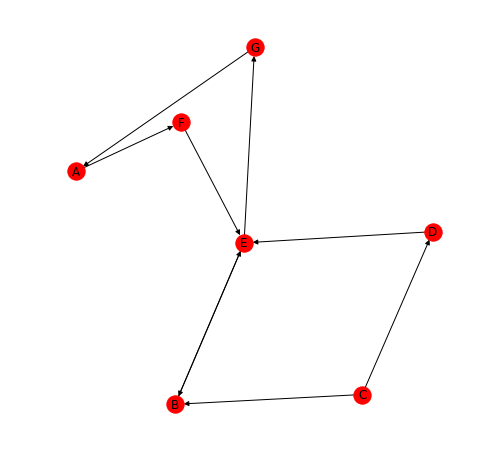

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

## our network as an adjacency matrix
adj = np.array([
    [ 0, 0, 0, 0, 0, 1, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 0, 0, 0, 1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 1, 0, 0, 0, 0, 0, 0]
])

## the names of our nodes
names = {
    0: "A",
    1: "B",
    2: "C",
    3: "D",
    4: "E",
    5: "F",
    6: "G"
}

## bringing our adjacency matrix into networkX
G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph())

## adding in the node labels
G = nx.relabel_nodes(G,names)

## make our figure a nice size (using matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network
nx.draw(G, with_labels = True)

#### 4.1.4.2 Layouts
That was the default, _spring_ layout. It's probably called the spring layout because the nodes push apart from one another. However, there's also some randomness built into, i.e., if we run the same plot again we'll get a different picture! To emphasize just how different network visualizations can be, here's the circular layout:

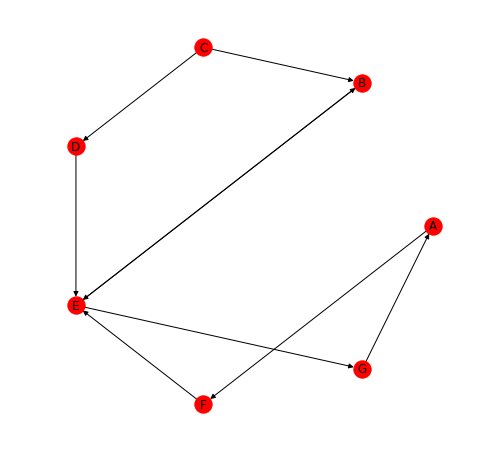

In [11]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network
nx.draw(G, with_labels = True, pos = nx.circular_layout(G))

The spring layout is a bit more common, but just for fun here's a crazy one. If you're curious, this one works to
> Position nodes using the eigenvectors of the graph Laplacian.

or in other words, the adjacency matrix eigenvectors&mdash;go linear algebra!

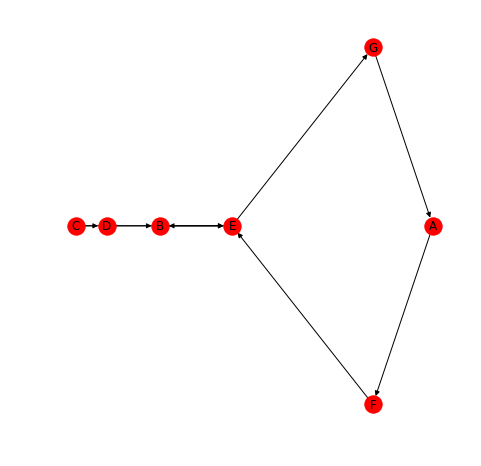

In [12]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network
nx.draw(G, with_labels = True, pos = nx.spectral_layout(G))

#### 4.1.4.3 Exercise: network visualization
Visualize a network of your choosing with 2 different layouts.

In [13]:
## code here

#### 4.1.4.4 Hairballs
The real problem with network visualization is that you can't tell what's going on when a network gets big... i.e., you wind up with a _hairball_. We could go on about how the different layout schemes are ambiguous, but perhaps the real issue is that most interesting networks have a _lot_ of nodes and links. Visualizing in this circumstance almost makes it impossible to tell what's going on, which is why we call them hairballs. Sure, a hairball might _look cool_, but does it actually provide any insight? To see this kind of issue let's look at a real-world social network drawn from the Twitter _platform_ by the Stanford Network Analysis Project (SNAP):
+ https://snap.stanford.edu/data/egonets-Twitter.html

This data set has about 80k nodes and 1.75 million links, so it's pretty big! The way they stored the data is with 1) anonymized IDs, in a simplest-possible space-separated two-column format. This makes it a bit easier to store, but we'll have to use a bit of work to pull it in to `NetworkX`. Note: the file is contained with this lecture in:
+ `./data/twitter_combined.txt`

If you're interested in networks, SNAP has a number of other exampls of networks drawn from different phenomena. Here's the master index:
+ https://snap.stanford.edu/data/

#### 4.1.4.5 Example, loading a network with Python-basic file i/o
First, we have to load the data in. Perhaps to be growable, the network's in a pretty raw format: space-delimited lines of `<sourceID> <targetID>` links (the link list implies the node names. This format actually makes it very easy to   grow/evolve the implied dnetwork over time, and new links may just be appended.

Note: since our goal is to visualize, we'll have to limit this network to just 5000 links!

In [14]:
## we'll need regular expressions to split the columns
import re

big_G = nx.DiGraph()

numlinks = 0

## open the  network file
with open("./data/twitter_combined.txt", "r") as f:
    ## loop over the lines
    for line in f:
        source, target = re.split(" ", line.strip())
        big_G.add_edge(source, target)
        
        numlinks += 1
        if numlinks == 5000:
            break

#### 4.1.4.6 Making a hairball look decent
When a network gets large enough, drawing the labels looks pretty bad, so let's just see what happens when we plot it with no labels.

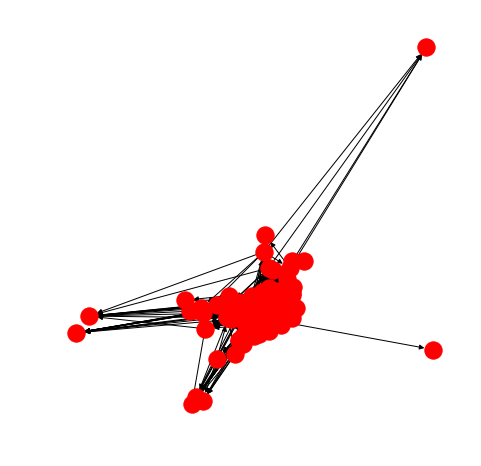

In [15]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network---don't plot the labels!!
nx.draw(big_G, with_labels = False)



As you can see, this still isn't very easy to understand, particularly since the nodes are large, non-transparent, and overlapping. We can make this a bit better by just drawing the network edges.

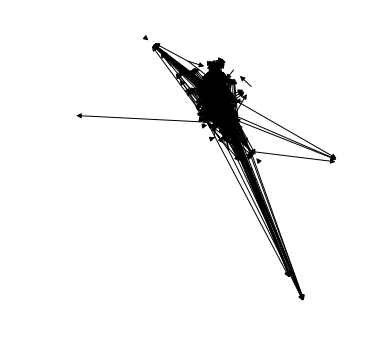

In [16]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network---don't plot the labels!!
_ = nx.draw_networkx_edges(big_G, pos = nx.spring_layout(big_G))

##
_ = plt.axis("off")

Even still, we can't see where these nodes are. So, let's try and at least get at some notion of density with a bit of alpha (transparency).

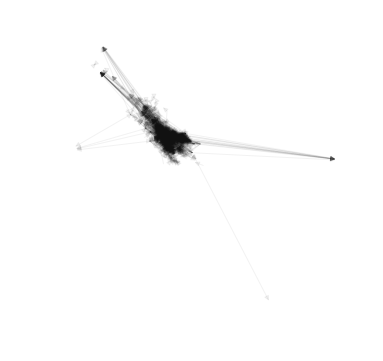

In [17]:
## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6,6))

## draw our network---don't plot the labels!!
_ = nx.draw_networkx_edges(big_G, pos = nx.spring_layout(big_G), alpha = 0.05)

##
_ = plt.axis("off")

## 4.2 Network modeling
While it's great for practice and intuition building, ball-and-stick network visualization is relatively limited in its ability to provide exploratory insight, perhaps most of all because of the ambiguities surrounding layout.  So, if looking at networks is limited, how do we work with them? Well, if you're not getting the picture: networks impose serious computational challenges, and they are difficult to interpret. This is why there's a whole field of study that has opened up around them: network science. This field is much more oriented towards quantitative analysis than visualization. When it comes to exploratory analysis, network _statistics_&mdash;and visualizations of them&mdash;generally provide more insight, and will come up again when we get more into exploratory data analysis (EDA).

But EDA is not the focus of our conversation here. We're interested in understanding how networks can be used as modeling tools, and will do so by discussing one very important networks method for analysis that was designed in one of the first big advances of data science: Google's web search.

### 4.2.1 Application: Google's web search
Well, we made it. All of this just to tell you how Google works? It's true, Google was okay&mdash;just another web search company&mdash;before they came up with their algorithm that changed things. What's that algorithm?

+ Find the primary eigenvector of a network's inbound transition matrix! 

Ultimately, what Google's _PageRank_ algorithm tells us is the portion of web surfers who will wind up at a web page from clicking their way around the internet: a model for how people behave online.

#### 4.2.1.1 The random websurfer model
The easiest way to start thinking about this has to do with random web surfers. The basic idea that the folks at Google had was that people click on webpages randomly. At whatever webpage they're at, there would be a few links sitting in front of them, and they would choose one, randomly. This idea eventually got dubbed the "random surfer" model. People would just keep clicking, around and around, until eventually, with some fixed probability, they would give up and start all over again from some entirely new page, at random, with some probability—we'll call this give-up-and-start-over probability $\alpha$.

![graph](images/random-graph-walk.jpg)

#### 4.2.1.2 Pages and hyperlinks? Nodes and edges.
This is a networks picture! Perhaps the key insight that they leveraged with this model is the perspective that the world wide web is a directed network of pages connected by hyperlinks. So, the world wide web looks like one giant network to Google. There are huuuge challenges in working with the whole world wide web, but we're not going to worry about that now! Instead, we'll just look at our old example network (from above).

#### 4.2.1.3 Transition matrices
Starting with an adjacency matrix:
$$ A = \begin{bmatrix} a_{1,1} & a_{1,2} & \dots & a_{1,n} \\ a_{2,1} & a_{2,2} & \dots & a_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m,1} & a_{m,2} & \dots & a_{m,n} \end{bmatrix} $$

In [18]:
## our old network as an adjacency matrix
adj = np.array([
    [ 0, 0, 0, 0, 0, 1, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 1, 0, 0, 0],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 0, 1, 0, 0, 0, 0, 1],
    [ 0, 0, 0, 0, 1, 0, 0],
    [ 1, 0, 0, 0, 0, 0, 0]
])

The first thing we need to define is called the _transition matrix_, which is a modification of the adjacency matrix in which each element in a given row is divided by its sum. This means the rows of a transition matrix always add up to 1, and consequently describes the probability that outbound traffic diffuses to adjacent webpages. Note: we'll talk more able forming probabilities from data in future chapters, and for the sake of this chapter take the details for granted. We can still perform the arithmetic!

$$ P = \begin{bmatrix} \frac{a_{1,1}}{\sum{a_{1,j}}} & \frac{a_{1,2}}{\sum{a_{1,j}}} & \dots & \frac{a_{1,n}}{\sum{a_{1,j}}} \\ \frac{a_{2,1}}{\sum{a_{2,j}}} & \frac{a_{2,2}}{\sum{a_{2,j}}} & \dots & \frac{a_{2,n}}{\sum{a_{2,j}}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{a_{n,1}}{\sum{a_{n,j}}} & \frac{a_{n,2}}{\sum{a_{n,j}}} & \dots & \frac{a_{n,n}}{\sum{a_{n,j}}} \end{bmatrix} $$

The individual values, $P_{i,j}$, tell us the probability that a surfer surfs (randomly) away from page $i$ and onto page $j$. To divide by the row sums of $A$ we can use:
+ `np.sum(A, axis = 1)`

then we'll have to take the transpose of this afterwords, to get a column vector that makes sure the rows are divided by their sums. However, this is not something numpy does by default, since vectors are 1-dimensional arrays to numpy, :/. So, we'll have to do a quick list comprehension to build a column vector from a list of 1-element (row-sum) lists:

In [19]:
## make the row sums into a column vector
rowsums = np.array([[x] for x in np.sum(adj, axis = 1)])

print(rowsums, '\n')

## make the transition matrix
P = adj / rowsums
print(P)

[[1]
 [1]
 [2]
 [1]
 [2]
 [1]
 [1]] 

[[0.  0.  0.  0.  0.  1.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  1.  0.  0. ]
 [0.  0.5 0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  1.  0.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]]


#### 4.2.1.4 PageRank is all about _inbound_ traffic
By taking the transpose of this matrix, we swap rows for columns, and then change the interpretation of a given row to be a node's inbound traffic probabilities:

 $$ Q = P^T = \begin{bmatrix} \frac{a_{1,1}}{\sum{a_{1,j}}} & \frac{a_{2,1}}{\sum{a_{2,j}}} & \dots & \frac{a_{n,1}}{\sum{a_{n,j}}} \\ \frac{a_{1,2}}{\sum{a_{1,j}}} & \frac{a_{2,2}}{\sum{a_{2,j}}} & \dots & \frac{a_{n,2}}{\sum{a_{n,j}}} \\ \vdots & \vdots & \ddots & \vdots \\ \frac{a_{1,n}}{\sum{a_{1,j}}} & \frac{a_{2,n}}{\sum{a_{2,j}}} & \dots & \frac{a_{n,n}}{\sum{a_{n,j}}} \end{bmatrix} $$
 
In other words, $Q_{i,j}$ tells us about the portion of surfers from page $j$ arriving at page $i$.

In [20]:
## transpose the transition matrix into the inbound traffic matrix
Q = np.transpose(P)

print(Q)

[[0.  0.  0.  0.  0.  0.  1. ]
 [0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0. ]
 [0.  1.  0.  1.  0.  1.  0. ]
 [1.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0. ]]


#### 4.2.1.5 Initializing the model
Now it's time to start our surfers off. We'll need a vector, $v$, which has the same dimension of the (rows or columns) of our matrix (network), describing the portion of the websurfer population at each page. To make things simple, the web surfers start out equally distributed across all of our web pages. So, for our tiny network of $7$ webpages we'll have $\frac{1}{7}$ of the surfers starting in each spot. In general, this would be:

In [21]:
## one seventh of the surfers start out at each node
v = np.array([1, 1, 1, 1, 1, 1, 1]) / 7
print(v)

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714]


#### 4.2.1.6 Advancing the model

This is th part where we allow the surfers to all 'click', and ask, where did they wind up? We can figure this out by using our inbound traffic, transition matrix ($Q$), since it tells us about how much traffic lands at each page. How? Matrix times vector! This will produce another (output) vector describing where everyone wound up.

So, to figure out where the volume of surfers wound up after their first click, all we now have to do is multiply (dot product) $Q$ times $v(0)$:

 $$ \begin{align} v(1) = Q\cdot v(0) &= \begin{bmatrix} q_{1,1} & q_{1,2} & \dots & q_{1,n} \\ q_{2,1} & q_{2,2} & \dots & q_{2,n} \\ \vdots & \vdots & \ddots & \vdots \\ q_{m,1} & q_{m,2} & \dots & q_{m,n} \end{bmatrix} \cdot \begin{bmatrix} v_{1} \\ v_{2} \\ \vdots \\ v_{n} \end{bmatrix}\\\\ & = \begin{bmatrix} q_{1,1}v_{1} + q_{1,2}v_{2} + \cdots + q_{1,n}v_{n} \\ q_{2,1}v_{1} + q_{2,2}v_{2} + \cdots + q_{2,n}v_{n} \\ \vdots \\ q_{m,1}v_{1} + q_{m,2}v_{2} + \cdots + q_{m,n}v_{n} \end{bmatrix} \end{align} $$
 
This is easy for us to do now with `NumPy`'s inner (dot) product:

In [22]:
## to find where the surfers will wind up after clicking
## simply take the dot product
print(Q.dot(v))

[0.14285714 0.14285714 0.         0.07142857 0.42857143 0.14285714
 0.07142857]


#### 4.2.1.7 So, where did all of the surfers go?
Nobody wound up at $C$! That's because there's no way to get to $C$. If it's hard to see from $v(1)$, we can get a view from our visualization, since this is a small (toy) network:

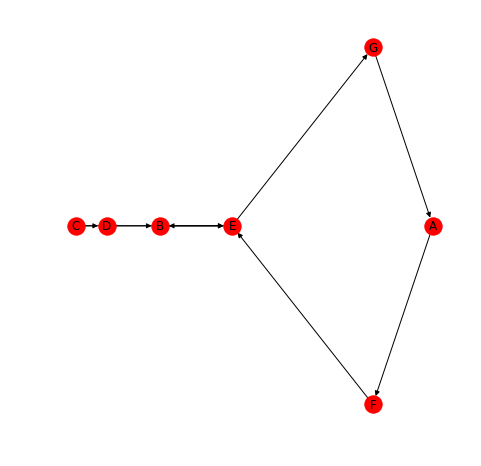

In [23]:
## the names of our nodes
names = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"}

## bringing our adjacency matrix into networkX
G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph())

## adding in the node labels
G = nx.relabel_nodes(G, names)

## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6, 6))

## draw our network
nx.draw(G, with_labels = True, pos = nx.spectral_layout(G))



#### 4.2.1.8 While linking is important, it's not (can't be) the whole PageRank story
According to our model description, some of the surfers should give up and visit a random page. This would be entirely how $C$ should get visits, so how do we incorporate the behavior?

It turns out we haven't accounted for this yet. Remember, we were going to call this give up probability $\alpha$. Let's do what most other folks do and choose $\alpha = 0.15$. This means that $\frac{\alpha}{n}$ of the surfers will wind up at $C$ or any other node, and that there's only a probability of $1 - \alpha = 0.85$ that any surfer will surf by clicking. Putting this together, we have:

 $$ 
 \begin{align} 
 v(1) &= \frac{\alpha}{n} + (1 - \alpha)Q\cdot v(0)\\ 
 &=  \begin{bmatrix} 
\frac{\alpha}{n} \\ 
\frac{\alpha}{n} \\ 
 \vdots \\ 
\frac{\alpha}{n} 
 \end{bmatrix} + 
 (1 - \alpha)
 \begin{bmatrix} 
 q_{1,1} & q_{1,2} & \dots & q_{1,n} \\ 
 q_{2,1} & q_{2,2} & \dots & q_{2,n} \\ 
 \vdots & \vdots & \ddots & \vdots \\ 
 q_{m,1} & q_{m,2} & \dots & q_{m,n} 
 \end{bmatrix} \cdot 
 \begin{bmatrix} 
 v_{1} \\ 
 v_{2} \\ 
 \vdots \\ 
 v_{n} 
 \end{bmatrix}\\\\ 
 & = \begin{bmatrix} 
 \frac{\alpha}{n} + (1 - \alpha)(q_{1,1}v_{1} + q_{1,2}v_{2} + \cdots + q_{1,n}v_{n}) \\ 
 \frac{\alpha}{n} + (1 - \alpha)(q_{2,1}v_{1} + q_{2,2}v_{2} + \cdots + q_{2,n}v_{n}) \\ 
 \vdots \\ 
 \frac{\alpha}{n} + (1 - \alpha)(q_{m,1}v_{1} + q_{m,2}v_{2} + \cdots + q_{m,n}v_{n}) 
 \end{bmatrix}
 \end{align} 
 $$
 
Since this just amounts to a few more pointwise operations—multiplying by and adding in constants—the update procedure is still pretty simple:

In [24]:
## the probability that a surfer gives up and starts over
alpha = 0.15

## find where the surfers will wind up after clicking
## or give up and starting over
print(alpha / 7 + (1 - alpha) * Q.dot(v))



[0.14285714 0.14285714 0.02142857 0.08214286 0.38571429 0.14285714
 0.08214286]


#### 4.2.1.9 So now where did the surfers all go?
Okay, each page is now getting some traffic, but where is this all headed? Well, after all the surfers click or give up & start over, their supposed to just do it all over again! And that's exactly what this PageRank algorithm is all about. The surfers just keep surfing. So, where do they wind up? Well that's the thing—the surfers eventually pile up in a very specific way that stops changing. This should remind us of something&mdash;what do we call a vector that we can multiply by a matrix to get the same vector back? An _eigenvector_, yes! 

The way Google has set up this problem, the sequence:
$$v(0), v(1), v(2), \cdots$$

converges towards a special eigenvector that is guaranteed to exist! They called this vector, $v_\infty$, the PageRank vector, and it actually doesn't take that much looping to get close. Let's look at the first ten values:

In [25]:
## the probability that a surfer gives up and starts over
alpha = 0.15

## the initial distribution of surfers
v = np.array([1, 1, 1, 1, 1, 1, 1]) / 7
print(v, '\n')

## update the surfer locations each time step
## with a matrix multiplication
## a total of 10 time steps
for i in range(10):
    ## updated where the surfers will wind up after clicking
    ## or giving up and starting over
    v = alpha / 7 + (1 - alpha) * Q.dot(v)
    print(v, '\n')

[0.14285714 0.14285714 0.14285714 0.14285714 0.14285714 0.14285714
 0.14285714] 

[0.14285714 0.14285714 0.02142857 0.08214286 0.38571429 0.14285714
 0.08214286] 

[0.09125    0.19446429 0.02142857 0.03053571 0.33410714 0.14285714
 0.18535714] 

[0.17898214 0.17253125 0.02142857 0.03053571 0.33410714 0.09899107
 0.16342411] 

[0.16033906 0.17253125 0.02142857 0.03053571 0.2781779  0.17356339
 0.16342411] 

[0.16033906 0.14876132 0.02142857 0.03053571 0.34156437 0.15771677
 0.13965418] 

[0.14013462 0.17570057 0.02142857 0.03053571 0.30789031 0.15771677
 0.16659343] 

[0.16303299 0.1613891  0.02142857 0.03053571 0.33078867 0.140543
 0.15228195] 

[0.15086823 0.1711209  0.02142857 0.03053571 0.30402621 0.16000661
 0.16201376] 

[0.15914027 0.15974685 0.02142857 0.03053571 0.32884231 0.14966657
 0.15063971] 

[0.14947233 0.1702937  0.02142857 0.03053571 0.31038534 0.1566978
 0.16118655] 



#### 4.2.1.10 Interpreting and utilizing the output
So, it looks like $C$ and $D$ don't get many surfers, while $E$ winds up with twice as many as it started with!

In fact, we can visualize (since the network is small) this converging balance of page importance, which Google uses to rank the hits it presents to you when you search:

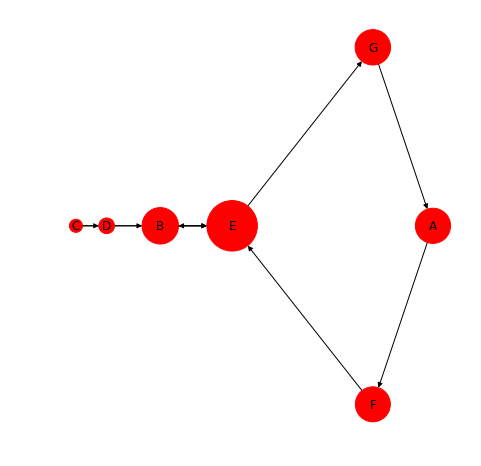

In [26]:
## the probability that a surfer gives up and starts over
alpha = 0.15

## the initial distribution of surfers
v = np.array([1, 1, 1, 1, 1, 1, 1]) / 7

## update the surfer locations each time step
## with a matrix multiplication
## a total of 100 time steps
for i in range(100):
    ## updated where the surfers will wind up after clicking
    ## or giving up and starting over
    v = alpha / 7 + (1 - alpha) * Q.dot(v)

## the names of our nodes
names = {0: "A", 1: "B", 2: "C", 3: "D", 4: "E", 5: "F", 6: "G"}

## bringing our adjacency matrix into networkX
G = nx.from_numpy_matrix(adj, create_using = nx.DiGraph())

## make our figure a nice size (it's still matplotlib)
fig = plt.figure(figsize = (6, 6))

## draw our network
nx.draw(G, labels = names, with_labels = True, pos = nx.spectral_layout(G), node_size = v * 8000)

#### 4.2.1.11 Is this really all it is?
So, according to the model, i.e., the network structure _and_ the rules on random web surfing that were put in place, $E$ is the most important node. But this isn't all that Google does to find pages for you. In reality, Google's algorithms takes a lot of different information and pulls it together. This models says what's important about a network's structure. Other stuff has to come in as well, like does the page match the searcher's keywords? 

At this point, Google's search algorithm incorporates a lot of different modeling strategies, but PageRank gave the search giant an early lead that no other really was ever able to make up for. This is in part because Google's strategy was much more advanced than the others of the time, but competition catches up quick, and to stay on top Google had to optimize (and still does) continually. This is where features like search personalization came from!

#### 4.2.1.12 Exercise: implementing a PageRank experiment
Run pagerank using the code provided in __Sec. 3.2.1.10__, but on a small network of your design loaded into NetworkX. Use this to pull out a numpy matrix and run the algorithm. Review the output, and interpret which node is the 'most important'.

In [27]:
## code here

### 4.2.2 Association Rule Mining
The above application of basic network theory  to web search is an example of the analysis of non-numerical (oftentimes referred to as _categorical_) data. Webpages are categories that are linked together by some relationship that we define&mdash;the hyperlink. But this is just one example, so to finish off our discussion we'll discuss another excellent technique for digging deeper into your categorical data which we will now discuss is called _association rule mining_, which play a very important rule in recommender systems, like Amazon's "you might also like to buy" features. 

#### 4.2.2.1 Frequently co-occurring itemsets
Association rule mining is generally used to obtain patterns in the co-occuring associations amongst a specific collection of items. Since it is so frequently applied to shopping, it is also often referred to as _market basket analysis_. The main object is to find certain associations of items which occur together more frequently than one might expect due solely to random chance. The canonical example usually discussed when introducing the concept is the so-called Beer and Diapers association. The idea (this is probably totally made up) is that men who go to the store in search of diapers are more likely to also buy beer. 

#### 4.2.2.2 Transaction data
Let's make up and examine a totally hypothetical retail transaction database for a store, detailing $600,000$ transactions overall:
+ 7,500 transactions involve diapers (1.25 %)
+ 60,000 transactions involve beer (10%)
+ 6,000 transactions involve both beer and diapers (1%)

#### 4.2.2.3 Quantifying co-occurrence
If it was the case that no significant relationship exists between the purchase of diapers and beer, we would expect that 10% of those who purchase diapers would also purchase beer (since 10% of the transactions overall involved beer). But our example holds that 80% of them do (6,000 / 7,500)! This is 8 times as many as we might expect due to random chance. This factor is often referred to as _lift_, which is formally defined as the ratio of of the observed frequency of co-occurence to the expected frequency. There are other important statistics relative to the problem of association rule mining. These are worthy of study in their own right and will come in closer to our conversation on statistics, but for the sake of our conversation here are not as important as another aspect of this application.

#### 4.2.2.4 Combinations of items
Note that in order to compute the lift (above) we had to know how often the two items&mdash;beer _and_ diapers&mdash;ocurred _together_. This is a counting problem and not as simple as calculating any individual items _frequency_, as the frequency of _sets_ of items relies on looking at all possible 2-, 3-item, etc., combinations inside of a given itemset. This is where our network's picuture comes in, but in particular to help up build a _principled_ intuition for how to navigate large database for combinations of items for which it's actually _worth_ computing lift.

#### 4.2.2.5 So, where's the network's picture?
We found the lift in our example by just manually counting the occurences in the database. Of course, we can use Python to automate this for us.  These statistics are easy enough to code up, but computing the combinations themselves can be costly. The problem is, in a large transaction database of potentially large (many-item) transactions there are a _huge_ number of combinations to count from the item subsets of item sets (transactions). Some of these won't occur very _frequently_, so should we really bother to count them all?

#### 4.2.2.6 A _lattice_ of related itemsets
The network we're going to look at here is really only a _theoretical_ relevance to the association rule mining problem we're talking about. The theoretical utility in this case means that there's really no reason for the modeler to ever construct such a network, but rather learn from it and apply knowledge to solve a problem. What it allows a modeler to do (supposing they're creating the algorithm) is inituitively understand a critical aspect of the problem that can be leveraged. We'll call this this critical insight the _Apriori principle_, and for the sake of this discussion should be taken anectodally for the kinds of insight that we may draw from a networks picture.

In particular, the type of network structure we're talking about is called a _lattice_. A lattice is a rigid, crystaline structure, i.e., can only contain certain linkages/exist in a very particular shape. The formal definition of lattice relies on the accumulation of some substantial mathematical language, so we'll just focus on our application. Our lattice (network) will consist of itemsets as nodes, linked by the property of subsumation. In other words, one itemset links to another if you can build the larger from the smaller by adding a single item. An entire latice may be constructed from the subsets of a single itemset, like $\{A,B,C,D\}$. This would look like the following:

![lattice](images/lattice.png)

What this tells us is that, before computing anything for an itemset such as $\{A,B,C\}$, we should first be consider the related itemsets $\{A,B\}$, $\{B,C\}$, and $\{A,C\}$.


#### 4.2.2.7 Counting itemset combinations 
While we called it frequency, in association rule mining the number of times a particular itemset occurs (potentially as a subset of a basket) is called the itemset's _support_. The question we're going to explore is, is it possible to   _only_ compute statistics for itemsets that occurred at least as often as some set support threshold? 

Let's call the support threshold $t$. The Apriori principle ultimately tells us which itemsets we should even bother checking the support for. The key observation from the lattice is that, e.g., since the itemset $\{A,B,C\}$ implies the existence of itemsets $\{A,B\}$, $\{B,C\}$, and $\{A,C\}$, the support of $\{A,B,C\}$ can't be larger than that of any of the smaller three. So, if _any_ of the smaller three (2-)item sets don't have support above the threshold $t$, we would automatically know that the support of $\{A,B,C\}$ cannot be above $t$&mdash;so don't even bother checking! Returning to our picture, if we found that $\{A,B\}$'s support was less than $t$ we could cross off a large section of the lattice, including $\{A,B,C\}$:

![lattice](images/pruned-lattice.png)

This is referred to as a 'bottom-up' strategy to 'pruning' the lattice, as one starts by observing the smallest possible itemsets (the singletons) for support. The&mdash;_Apriori_&mdash;algorithm then only goes on to observe the support larger, subsuming itemsets for which _all_ predecessors had support above the threshold. The result is a much more efficient mechanism to counting co-occurrence.

#### 4.2.2.8 Exercise: the apriori algorithm
Make up a tiny market basket dataset with $10$ baskets of `{A,B,D,F}`-like purchases make sure they have overlapping itemsets! Then, utilize the apriori principle to find all frequent itemsets, given a set support threshold (of your choosing).

In [28]:
## code here